In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from eda_rinus import timechange, features, features_aggr, counting_mood_days
import numpy as np


# read csv file
sdf = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

# drop rows where there's no number in column named 'value'
# sdf.dropna()

# Example of filtering mood values being non-negative
# sdf_mood = sdf.loc[(sdf['variable'] == 'mood')]
# index_neg = sdf_mood[sdf_mood['value'] < 0].index
# sdf_mood.drop(index_neg, inplace=True)
# display(sdf_mood)

# retrieve index for which column named 'value' is negative
# index_neg = sdf[sdf['value'] < 0].index

# drop those indexes
# sdf.drop(index_neg, inplace=True)

display(sdf)

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
sdf = timechange(sdf)
display(sdf)



,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.000,13
2,AS14.01,2014-02-26,mood,6.000,15
3,AS14.01,2014-02-26,mood,6.000,18
4,AS14.01,2014-02-26,mood,7.000,21
5,AS14.01,2014-02-27,mood,6.000,9
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,appCat.weather,8.032,7
2772465,AS14.30,2014-04-19,appCat.weather,3.008,11
2774026,AS14.30,2014-04-26,appCat.weather,7.026,10
2774133,AS14.30,2014-04-27,appCat.weather,23.033,0


In [3]:
print("features (not combined)")
print(features(sdf))

features (not combined)
                        count    mean     std       min    25%    50%     75%  \
variable                                                                        
mood                   5641.0    6.99    1.03      1.00   7.00   7.00    8.00   
circumplex.arousal     5597.0   -0.10    1.05     -2.00  -1.00   0.00    1.00   
circumplex.valence     5487.0    0.69    0.67     -2.00   0.00   1.00    1.00   
activity              22965.0    0.12    0.19      0.00   0.00   0.02    0.16   
screen                96578.0   75.34  253.82      0.04   5.32  20.04   62.54   
call                   5239.0    1.00    0.00      1.00   1.00   1.00    1.00   
sms                    1798.0    1.00    0.00      1.00   1.00   1.00    1.00   
appCat.builtin        91288.0   18.54  415.99 -82798.87   2.02   4.04    9.92   
appCat.communication  74276.0   43.34  128.91      0.01   5.22  16.23   45.48   
appCat.entertainment  27125.0   37.58  262.96     -0.01   1.33   3.39   14.92   
appC

In [4]:
print("features (combined)")
print(features_aggr(sdf, aggr_features=True))


features (combined)
                      count   mean     std       min   25%    50%    75%  \
variable                                                                   
mood                 5641.0   6.99    1.03      1.00  7.00   7.00   8.00   
circumplex.values   11084.0   0.29    0.97     -2.00  0.00   1.00   1.00   
activity            22965.0   0.12    0.19      0.00  0.00   0.02   0.16   
screen              96578.0  75.34  253.82      0.04  5.32  20.04  62.54   
call                 5239.0   1.00    0.00      1.00  1.00   1.00   1.00   
sms                  1798.0   1.00    0.00      1.00  1.00   1.00   1.00   
appCat.values      233405.0  34.24  305.64 -82798.87  3.01   7.04  25.50   

                        max  trimmed mean  
variable                                   
mood                  10.00      7.033090  
circumplex.values      2.00      0.355779  
activity               1.00      0.090174  
screen              9867.01     41.731878  
call                   1.00    

In [5]:
# calculate average value per variable per day
display(sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index())


,id,time,variable,value
0,AS14.01,2014-02-17,call,1.000000
1,AS14.01,2014-02-18,call,1.000000
2,AS14.01,2014-02-19,call,1.000000
3,AS14.01,2014-02-19,sms,1.000000
4,AS14.01,2014-02-20,call,1.000000
...,...,...,...,...
8207,AS14.33,2014-05-30,circumplex.values,-0.600000
8208,AS14.33,2014-05-30,mood,6.800000
8209,AS14.33,2014-05-30,screen,86.342245
8210,AS14.33,2014-05-31,circumplex.values,-0.500000


In [7]:
mood_days, moodless_days = counting_mood_days(sdf)

print("mood_days: ")
print(mood_days)
print("moodless_days: ")
print(moodless_days)





mood_days: 
[{'AS14.01': 222}, {'AS14.02': 159}, {'AS14.03': 221}, {'AS14.05': 241}, {'AS14.06': 203}, {'AS14.07': 192}, {'AS14.08': 299}, {'AS14.09': 197}, {'AS14.12': 185}, {'AS14.13': 244}, {'AS14.14': 164}, {'AS14.15': 269}, {'AS14.16': 231}, {'AS14.17': 237}, {'AS14.19': 221}, {'AS14.20': 202}, {'AS14.23': 159}, {'AS14.24': 238}, {'AS14.25': 131}, {'AS14.26': 329}, {'AS14.27': 199}, {'AS14.28': 169}, {'AS14.29': 187}, {'AS14.30': 224}, {'AS14.31': 198}, {'AS14.32': 128}, {'AS14.33': 192}]
moodless_days: 
[{'AS14.01': 21777}, {'AS14.02': 14422}, {'AS14.03': 14204}, {'AS14.05': 15504}, {'AS14.06': 17889}, {'AS14.07': 15853}, {'AS14.08': 7603}, {'AS14.09': 10689}, {'AS14.12': 17126}, {'AS14.13': 19348}, {'AS14.14': 9122}, {'AS14.15': 2579}, {'AS14.16': 3751}, {'AS14.17': 15589}, {'AS14.19': 11176}, {'AS14.20': 3418}, {'AS14.23': 21693}, {'AS14.24': 14192}, {'AS14.25': 12458}, {'AS14.26': 16074}, {'AS14.27': 14376}, {'AS14.28': 19107}, {'AS14.29': 17312}, {'AS14.30': 17055}, {'AS14.31

In [ ]:
display(sdf)

,id,time,variable,value,hour
1,AS14.01,2014-02-26,mood,6.000,13
2,AS14.01,2014-02-26,mood,6.000,15
3,AS14.01,2014-02-26,mood,6.000,18
4,AS14.01,2014-02-26,mood,7.000,21
5,AS14.01,2014-02-27,mood,6.000,9
...,...,...,...,...,...
2770399,AS14.30,2014-04-11,appCat.values,8.032,7
2772465,AS14.30,2014-04-19,appCat.values,3.008,11
2774026,AS14.30,2014-04-26,appCat.values,7.026,10
2774133,AS14.30,2014-04-27,appCat.values,23.033,0


In [48]:
# make a dict of all variables that are in the csv file
feat_dict = {
        'mood': float(0),
        'circumplex.arousal': float(0),
        'circumplex.valence': float(0),
        'activity': float(0),
        'screen': float(0),
        'sms': float(0),
        'appCat.builtin': float(0),
        'appCat.communication': float(0),
        'appCat.entertainment': float(0),
        'appCat.finance': float(0),
        'appCat.game': float(0),
        'appCat.office': float(0),
        'appCat.other': float(0),
        'appCat.social': float(0),
        'appCat.travel': float(0),
        'appCat.unknown': float(0),
        'appCat.utilities': float(0),
        'appCat.weather': float(0),
    }

# calculate average value per variable per day and keep only one per variable per day left
new_sdf = sdf.groupby(['id', 'time', 'variable'])['value'].mean().to_frame().reset_index()

# transform sdf to a pivot table --> this lines up the distinct variables into columns instead of rows
# based on: https://pandas.pydata.org/docs/user_guide/reshaping.html
sdf_pivot = new_sdf.pivot(index=['id', 'time'], columns=['variable'], values=['value'])
sdf_pivot.columns = sdf_pivot.columns.droplevel(0)
# tranform pivot table back into a dataframe to make it easier to work with
organised_sdf = sdf_pivot.reset_index().rename_axis(None, axis=1)
display(organised_sdf)





,id,time,activity,appCat.values,call,circumplex.values,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,27.741684,1.0,-0.600000,6.8,86.342245,NaN


In [44]:
sdf_pivot.columns = sdf_pivot.columns.droplevel(0)
df = sdf_pivot.reset_index().rename_axis(None, axis=1)
display(df)
# for col in df.columns:
#     print(col)
# iterating the columns
# for col in df.columns:
#     print(col)
# display(df[1])

,id,time,activity,appCat.values,call,circumplex.values,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,29.703532,1.0,-0.100000,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,27.164437,1.0,0.600000,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,32.128034,1.0,-0.166667,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,27.741684,1.0,-0.600000,6.8,86.342245,NaN


ValueError: Could not interpret input 'ARRIVAL_DELAY'

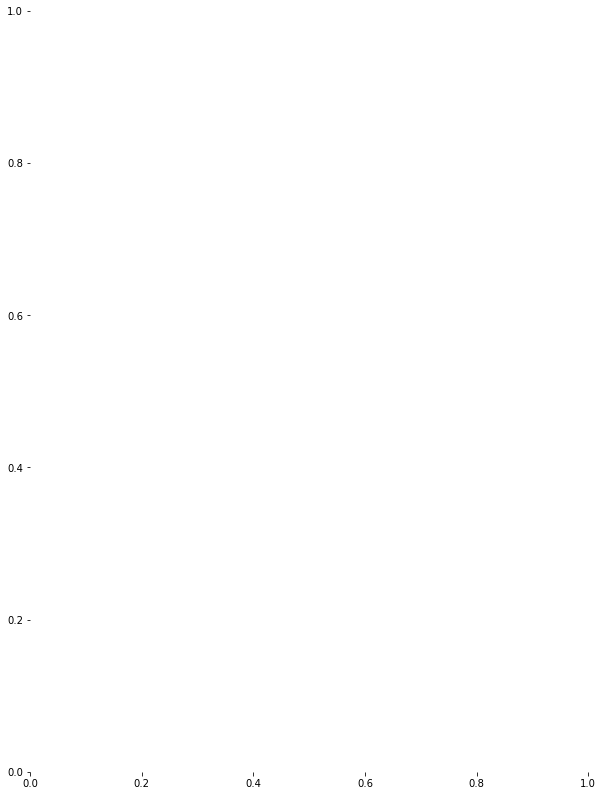

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(sdf_pivot.corr(),annot = True)
plt.show()



axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
# users = sdf_pivot.id.unique()
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = sdf_pivot, dodge=True, jitter=True
            )
plt.show()


axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="id",
              data = train_data, dodge=True, jitter=True
            )
plt.show()


# transposed_df = new_sdf.set_index(['id', 'time']).T.reset_index()
# transposed_df = new_sdf.set_index(['id', 'time']).stack().reset_index()
# new_sdf["idx", 'time'] = new_sdf.groupby(["id", 'time']).cumcount()
# transposed_df = new_sdf.pivot("idx", "id", "time").reset_index(drop=True).rename_axis(columns=None)
# dict_features = feat_dict()
# for key in dict_features:
#     print(key)